## Problem Statement:

### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

## Importing requried Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os 
import pickle
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform, LabelEncoder, PowerTransformer, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from scipy import stats
from scipy.stats import zscore
import statsmodels.api as sm

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
#drop _c39 columns
df.drop('_c39',axis=1,inplace=True)

In [7]:
df.shape

(1000, 39)

<AxesSubplot:>

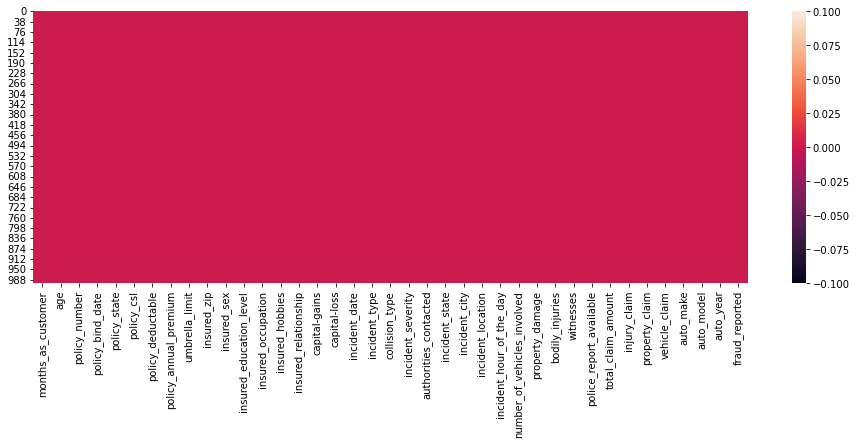

In [8]:
#Cheking null values again
plt.figure(figsize = (16,5))
sns.heatmap(df.isnull()) #Looking for null values if any, in heatmap

In [9]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('==========================================================')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

In [11]:
df.isin(['?']).sum() #Checking for ? values in dataset

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [12]:
#Checking collision_type unique values with value count
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [13]:
#Checking property_damage unique values with value count
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [14]:
#Checking police_report_available unique values with value count
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [15]:
# Replacing '?' by the most common collision type using mode
df['collision_type']=df['collision_type'].replace('?', 'Rear Collision')

# If there is no values in property_damage then it means no property damage.
df['property_damage']=df['property_damage'].replace('?', 'NO')

# If there is nothing in police_report_available, that means there is no FIR and nothing.
df['police_report_available']=df['police_report_available'].replace('?', 'NO')

In [16]:
df.isin(['?']).sum() #Checking for ? values in dataset

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [17]:
# Lets do statical analysis, Get unique and top values for the dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


## Univariate Analysis

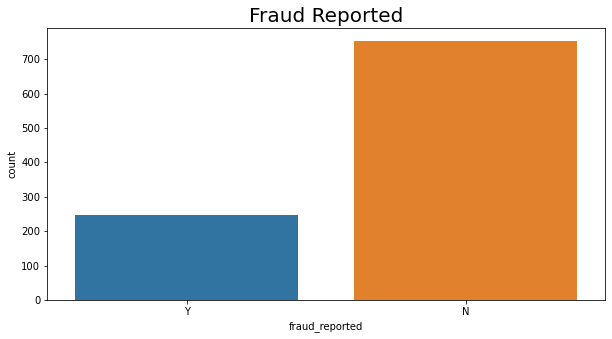

In [18]:
plt.figure(figsize = (10,5)) #Plotting with size of 10 * 5
sns.countplot(x="fraud_reported", data=df) #Plotting Countplot for fraud_reported
plt.title("Fraud Reported", fontsize = 20) #Setting up the title
plt.show() #plotting the graph

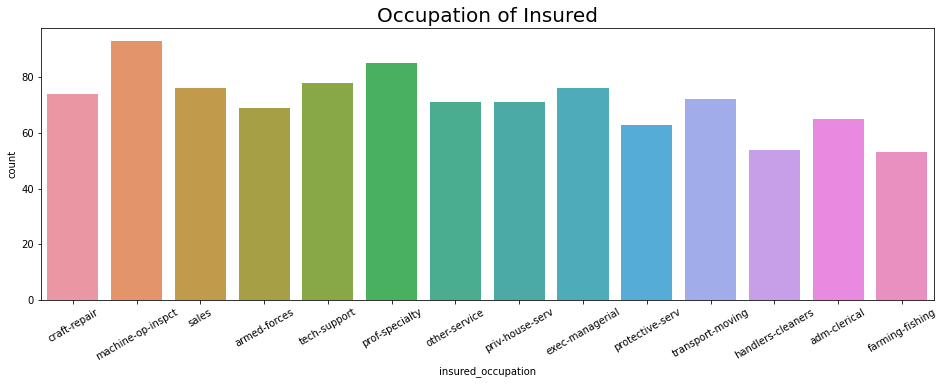

In [19]:
plt.figure(figsize = (16,5)) #Plotting with size of 10 * 5
ax=sns.countplot(x="insured_occupation", data=df) #Plotting Countplot for insured_occupation
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Occupation of Insured", fontsize = 20) #Setting up the title
plt.show() #plotting the graph

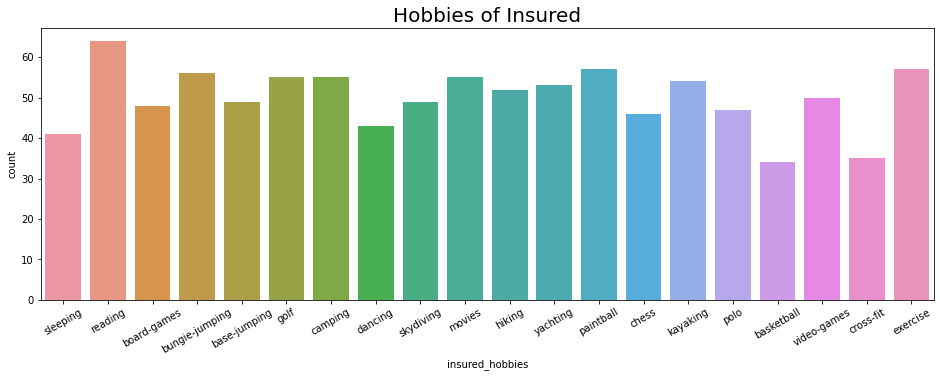

In [20]:
plt.figure(figsize = (16,5)) #Plotting with size of 10 * 5
ax=sns.countplot(x="insured_hobbies", data=df) #Plotting Countplot for insured_sex
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Hobbies of Insured", fontsize = 20) #Setting up the title
plt.show() #plotting the graph

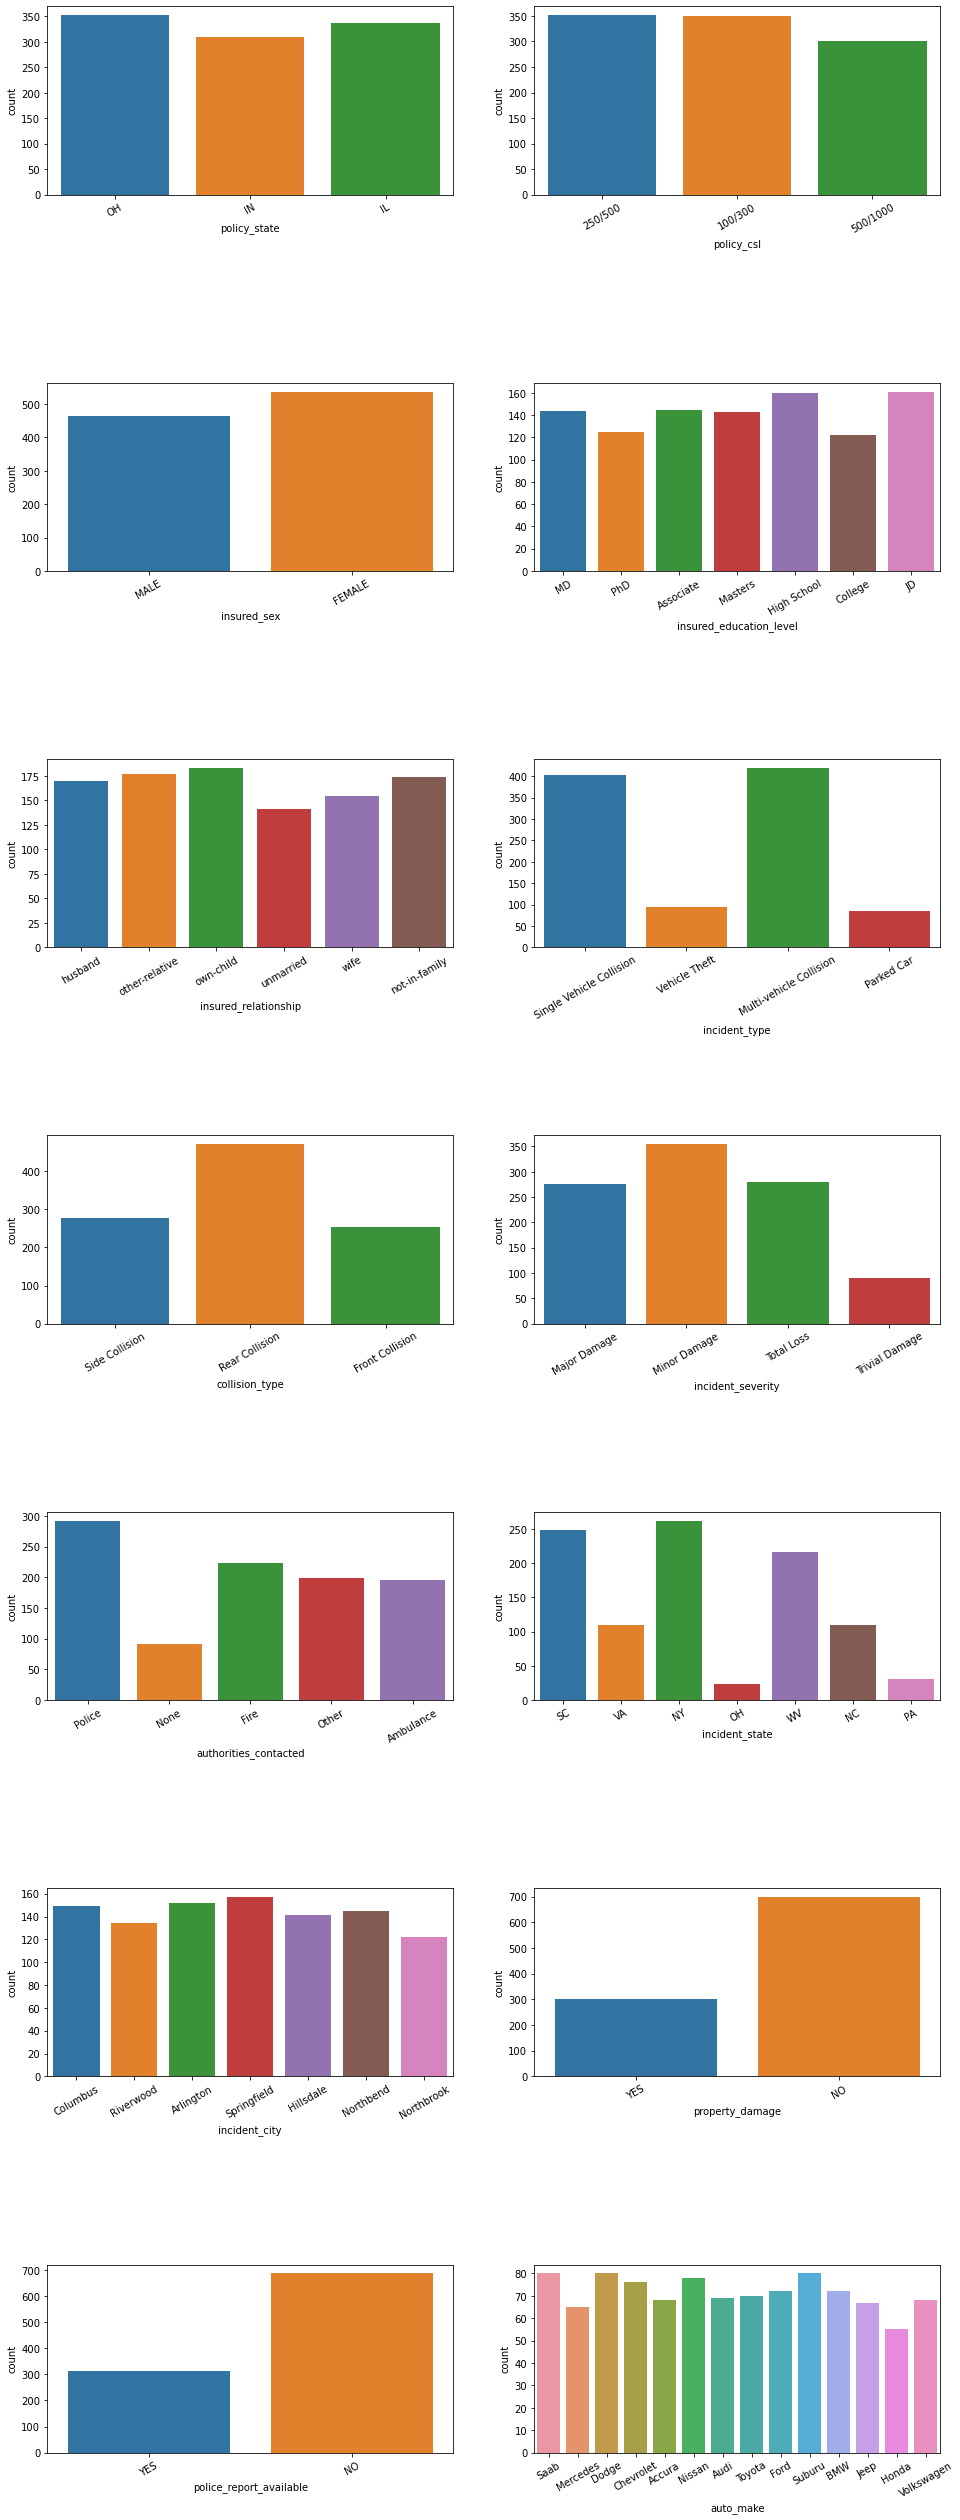

In [21]:
label_list = ['policy_state','policy_csl','insured_sex','insured_education_level','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make']
fig,axes = plt.subplots(7,2,figsize=(16,45))
for i,cat in enumerate(label_list):
    row,col = i//2,i%2 #getting size of plots in row and cols 
    ax=sns.countplot(x=cat,data=df,ax=axes[row,col]) #Plotting count plot with hue Loan Status
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.subplots_adjust(hspace=1) # Plotting the graphs

* Policy_state is high in OH and IL where as low in IN.

* Policy_csl is 250/500 and 100/300 is high where as 500/1000 is less.

* Female applied for Insurance more than Male.

* Mosty insured person have education level High School and JD.

* The person who have child, those peoples did insurances more.

* Singlie Vehicle Collision and Multi vehicle Collision had more incident where as Vehile Theft and Parked car incidents are less.

* Rear Collision is more than 400 where as Front collision is less.

* Minor Damages are happen more where as Trival Damages are less.

* People contacted more and in very less conditions people didn't call to anyone.

* More incident happen in NY where as in OH very less incident happen.

* Almost all cities have same number of incidents.

* Property damages are less.

* Police reports are available only in 30% cases.

* All cars are insured equally near 60-80.

## Bi-variate Analysis

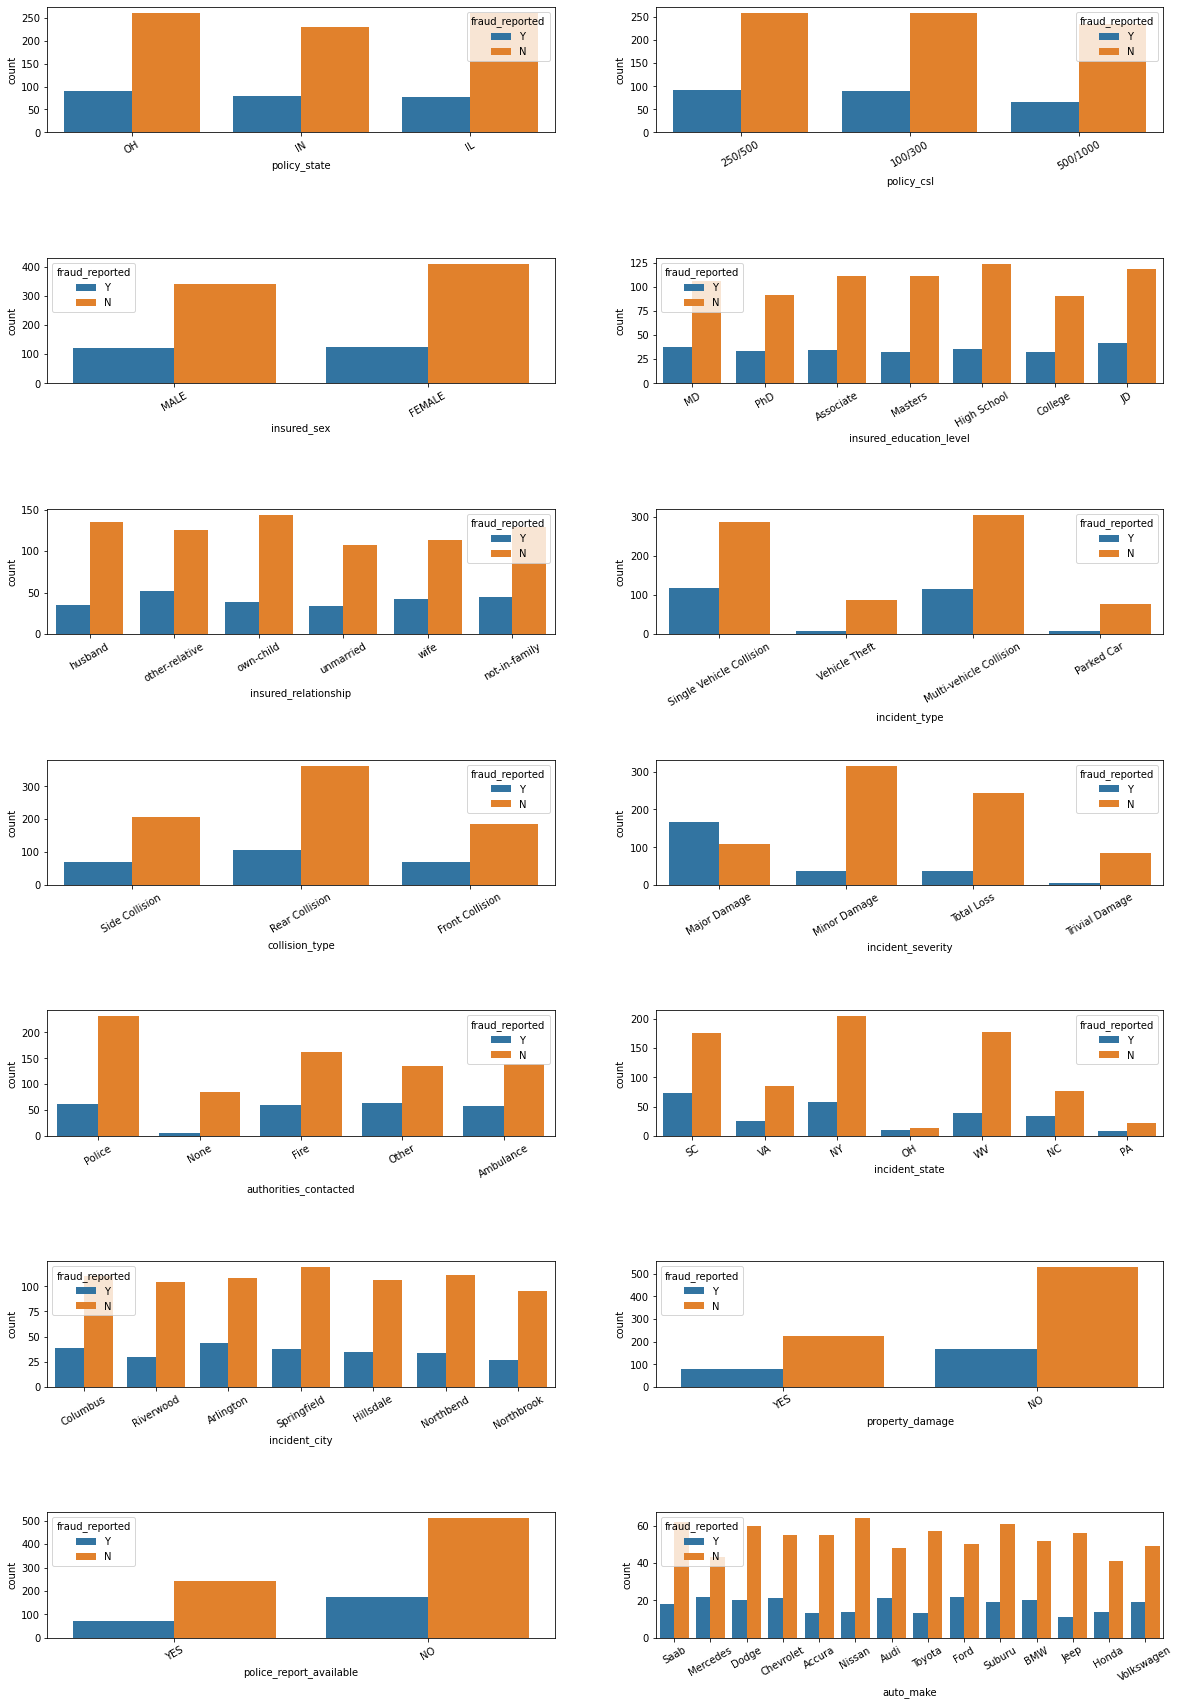

In [22]:
fig,axes = plt.subplots(7,2,figsize=(20,30))
for i,cat in enumerate(label_list):
    row,col = i//2,i%2 #getting size of plots in row and cols 
    ax=sns.countplot(x=cat,data=df,hue='fraud_reported',ax=axes[row,col]) #Plotting count plot with hue Loan Status
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.subplots_adjust(hspace=1) # Plotting the graphs

* In OH and IL Policy state Fraud didn't happen much when comapred with IN. In IN Fraud happen more than OH and IL.

* In Policy_csl 250/500 and 100/300 Fraud reported more than 500/1000.

* More number of Fraud case reported against Female.

* Person who have education level JD did more frauds than others.

* People who have other relatives has reported highest fraude cases.

* In case of Singlie Vehicle Collision and Multi vehicle Collision maximum frauds happened.

* When Collision type is Rear, Fraud reported more.

* At the time of Major Damages, Fraud is reported too high.

* When People didn't call to anyone that time Fraud happen very less. If person contacted to anyone, Fraud happened.

* In SC state Fraue Reported more than other states.

* Almost all cities have same number of Fraud Reported.

* When Property is not damages that time Fraud happed more.

* When there is no Police report available that time Fraaud happen more.

* Mercedes and Ford have more number of Fraud Reported.

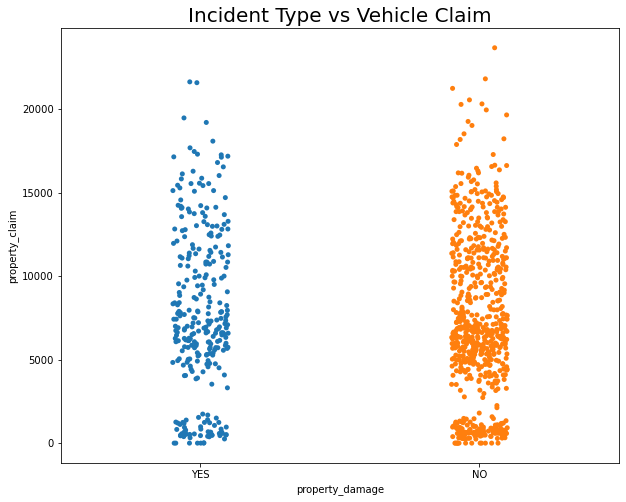

In [23]:
plt.figure(figsize = (10,8))
sns.stripplot(df['property_damage'], df['property_claim'])
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

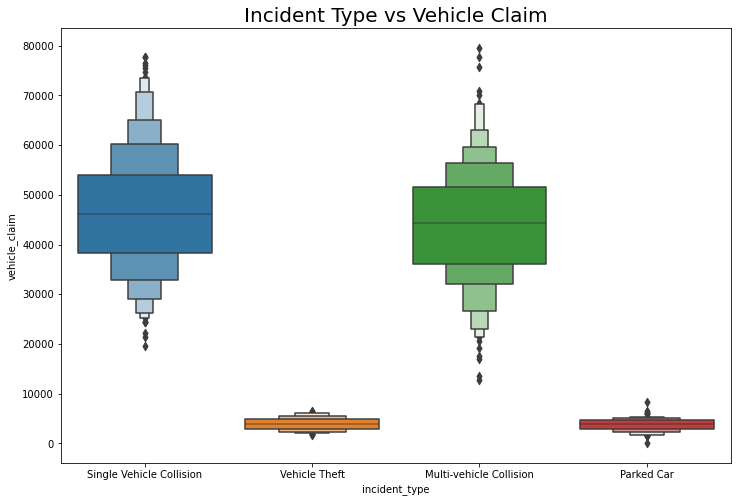

In [24]:
plt.figure(figsize = (12,8))
sns.boxenplot(df['incident_type'], df['vehicle_claim'])
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

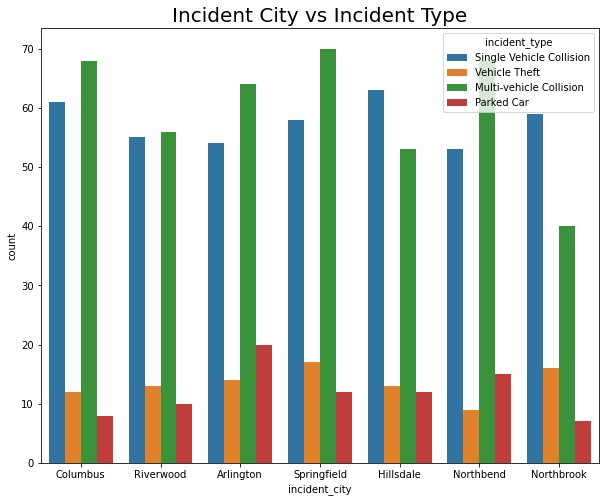

In [25]:
plt.subplots(figsize=(10, 8))
sns.countplot(x='incident_city',hue='incident_type',data=df)
plt.title('Incident City vs Incident Type', fontsize = 20)
plt.show()

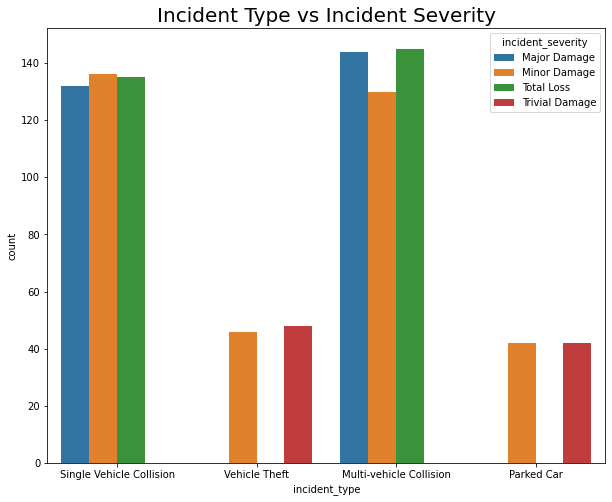

In [26]:
plt.subplots(figsize=(10, 8))
sns.countplot(x='incident_type',hue='incident_severity',data=df)
plt.title('Incident Type vs Incident Severity', fontsize = 20)
plt.show()

We can clearly see that In Single Vehicle collision and Multi-vehicle collision, Mjor Damage,Minor Damage and Total loss happened, where as when Vehicle is Theft or car was parked that time Minor damage and Trival Damage happen.

## Multi-Variate Analysis

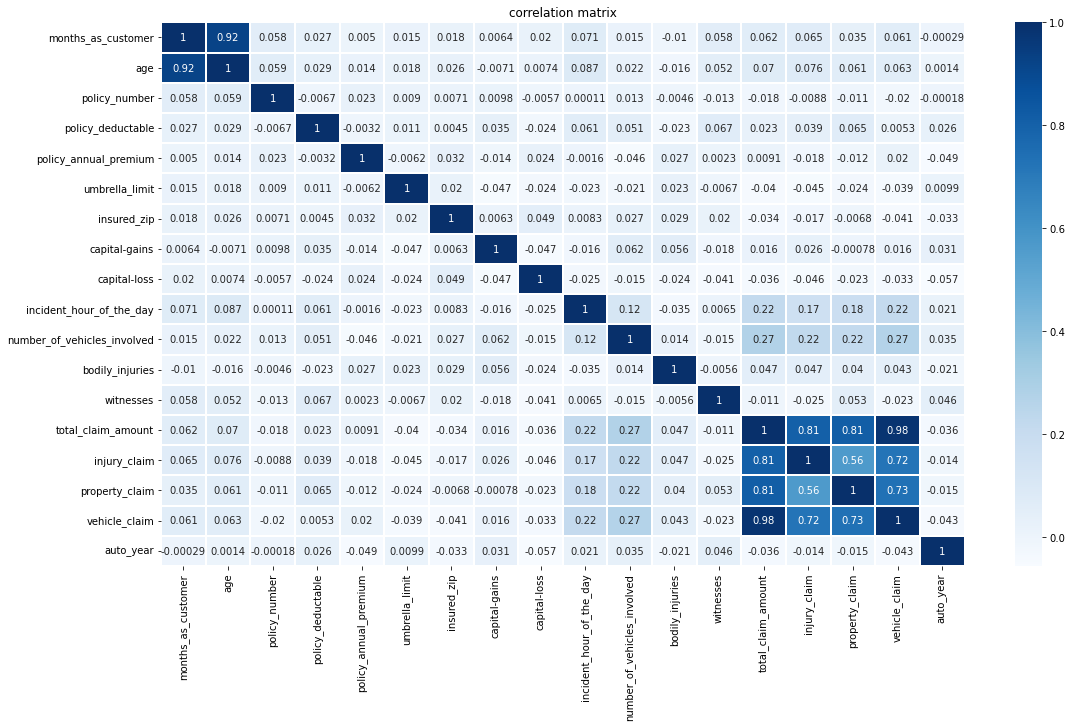

In [27]:
fig=plt.figure(figsize=(18,10))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

In [28]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


## Feature Engineering

In [30]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [31]:
df['csl_per_person']=df.policy_csl.str.split('/',expand=True)[0]
df['csl_per_accident']=df.policy_csl.str.split('/',expand=True)[1]

In [32]:
#Converting Auto Year into Vehicle Age by subtracting 2020
df['vehicle_age'] = 2020 - df['auto_year']

In [34]:
df=df.drop(['policy_csl', 'auto_year', 'policy_number', 'insured_zip', 'policy_bind_date', 'incident_date','incident_location','incident_hour_of_the_day'], axis = 1)

In [35]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,vehicle_age
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,71610,6510,13020,52080,Saab,92x,Y,250,500,16
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,5070,780,780,3510,Mercedes,E400,Y,250,500,13
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,34650,7700,3850,23100,Dodge,RAM,N,100,300,13
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,63400,6340,6340,50720,Chevrolet,Tahoe,Y,250,500,6
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,6500,1300,650,4550,Accura,RSX,N,500,1000,11


In [36]:
#Getting all columns i.e. (int64) values in int_label
int_label=list(df.select_dtypes(['int64']).columns)

## Label Encoding

In [37]:
label_list=list(df.select_dtypes(['object']).columns) #Getting the list of object columns in label_list 
le=LabelEncoder() #initilizing Label Encoder
for i in label_list:
    df[i] = le.fit_transform(df[i]) #Converting Object coulmns to number's using label encoder

In [38]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,vehicle_age
0,328,48,2,1000,1406.91,0,1,4,2,17,...,71610,6510,13020,52080,10,1,1,1,2,16
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,5070,780,780,3510,8,12,1,1,2,13
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,34650,7700,3850,23100,4,30,0,0,1,13
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,63400,6340,6340,50720,3,34,1,1,2,6
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,6500,1300,650,4550,0,31,0,2,0,11


## Removing Skewness and Outliers

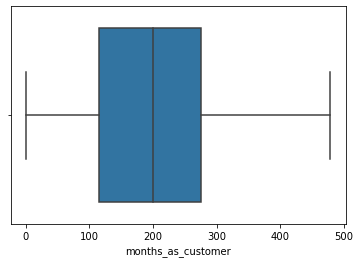

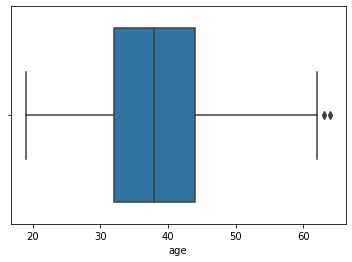

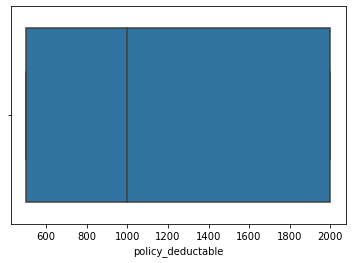

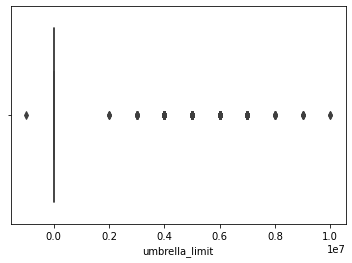

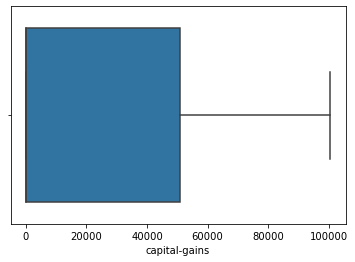

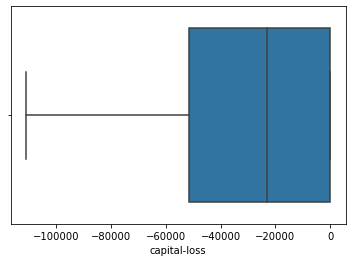

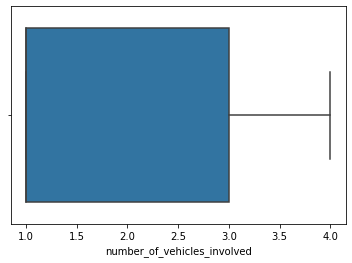

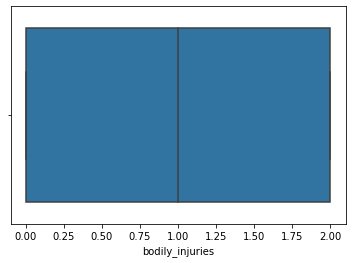

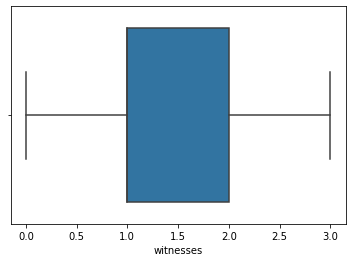

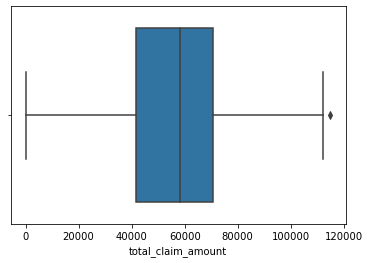

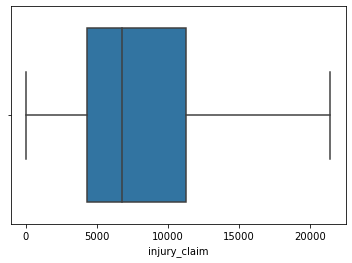

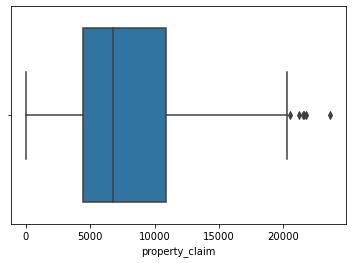

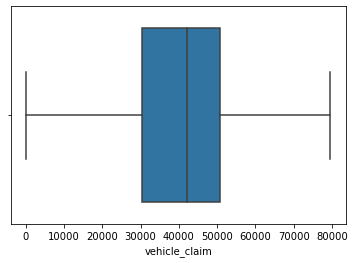

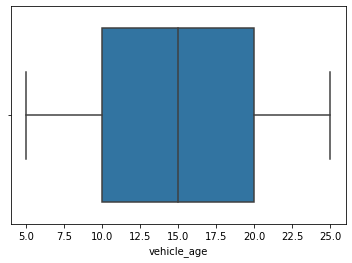

In [39]:
for i in int_label:
    plt.figure()
    sns.boxplot(x=df[i])

In [40]:
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 26,  5,  5,  5,  4, 12,
        5,  5,  5], dtype=int64))


In [41]:
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]
print(df.shape)
print(new_df.shape)

(1000, 34)
(980, 34)


In [42]:
#checking for how much data we lost
loss_percent=(1000-980)/1000*100
print(loss_percent)

2.0


In [43]:
#Checking skewness of all columns
new_df.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221
total_claim_amount            -0.593593


In [44]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [45]:
#Looks like umbrella_limit have few values and feels like catagorical, So we'll not change it's skewness.
int_label.remove('umbrella_limit')

In [46]:
PT=PowerTransformer()
for i in int_label:
    if abs(new_df.loc[:,i].skew())>0.55:
        new_df.loc[:,i]=PT.fit_transform(new_df.loc[:,i].values.reshape(-1,1))

In [47]:
new_df.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221
total_claim_amount            -0.508540


## Seperating Input and Output Variables

In [48]:
x = new_df.drop("fraud_reported", axis=1)
y = new_df["fraud_reported"]

## Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #Initializting MinMaxScaler
new = scale.fit(x)  #fitting our data into MinMaxScaller
scale_x = new.transform(x) #Transforming the data
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,csl_per_person,csl_per_accident,vehicle_age
0,0.684760,0.644444,1.0,0.333333,0.606891,0.125,1.0,0.666667,0.153846,0.894737,...,1.0,0.601570,0.303497,0.596974,0.630462,0.769231,0.026316,0.5,1.0,0.55
1,0.475992,0.511111,0.5,1.000000,0.460404,0.750,1.0,0.666667,0.461538,0.789474,...,0.0,0.034552,0.036364,0.035763,0.033065,0.615385,0.315789,0.5,1.0,0.40
2,0.279749,0.222222,1.0,1.000000,0.611243,0.750,0.0,1.000000,0.846154,0.105263,...,0.0,0.275635,0.358974,0.176525,0.260054,0.307692,0.789474,0.0,0.5,0.40
3,0.534447,0.488889,0.0,1.000000,0.613059,0.875,0.0,1.000000,0.076923,0.105263,...,0.0,0.527777,0.295571,0.290692,0.612557,0.230769,0.894737,0.5,1.0,0.05
4,0.475992,0.555556,0.0,0.333333,0.730541,0.875,1.0,0.000000,0.846154,0.105263,...,0.0,0.045274,0.060606,0.029803,0.044007,0.000000,0.815789,1.0,0.0,0.30


## Finding Best Random State

In [51]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8231292517006803  on Random_state  63


## Train Test Split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

## Finding Best Algorithm

In [53]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier

In [54]:
model=[LogisticRegression(),KNeighborsClassifier(),AdaBoostClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),MLPClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.8231292517006803
[[218  16]
 [ 36  24]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       234
           1       0.60      0.40      0.48        60

    accuracy                           0.82       294
   macro avg       0.73      0.67      0.69       294
weighted avg       0.81      0.82      0.81       294

[0.78571429 0.75510204 0.75       0.79081633 0.79081633]
0.7744897959183674
Difference between Accuracy score and cross validation score is -  0.04863945578231288
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
||||||||||||||||||||||||||

## Hyper Parameter Tuning

In [56]:
parameters={'n_estimators': range(0,20),
            'learning_rate': [0.1,0.01,0.001,0.0001,1],
            'algorithm':['SAMME', 'SAMME.R'],
            'random_state':range(0,20)}

clf=GridSearchCV(AdaBoostClassifier(), parameters,cv=5)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_  #Best parameters

{'algorithm': 'SAMME',
 'learning_rate': 0.1,
 'n_estimators': 1,
 'random_state': 0}

In [57]:
clf_pred=clf.best_estimator_.predict(x_test) #prediting result based on test based

In [58]:
accuracy_score(y_test,clf_pred) #finding accuracy score of the data

0.8435374149659864

In [59]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.8435374149659864
[[204  30]
 [ 16  44]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       234
           1       0.59      0.73      0.66        60

    accuracy                           0.84       294
   macro avg       0.76      0.80      0.78       294
weighted avg       0.86      0.84      0.85       294



## AUC ROC curve

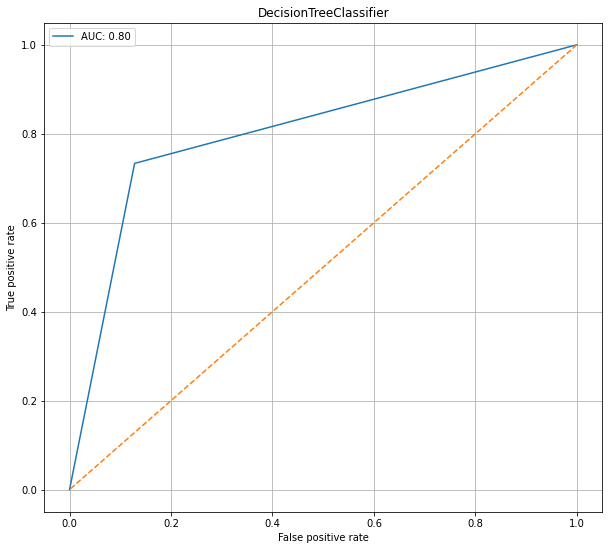

In [62]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

## Saving the model

In [63]:
import joblib
joblib.dump(clf.best_estimator_,"PJ10_Insurance.obj")
SVR_from_joblib=joblib.load("PJ10_Insurance.obj")
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0])

In [64]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293
Predicted,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0
